### Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [18]:
df = pd.read_csv('C:/Users/muham/OneDrive/Documents/KULIAH SEMESTER 7/MACHINE LEARNING/UTS/clusteringmidterm.csv')

# Display basic dataset information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# Dataset info
print(f"\nDataset Info:")
print(f"Total customers: {len(df):,}")
print(f"Total columns: {df.shape[1]}")
print(f"\nColumn names:")
print(df.columns.tolist())

# Basic statistics
print(f"\nBasic Statistics:")
display(df.describe())

# Data types
print(f"\nData Types:")
print(df.dtypes)

Dataset shape: (8950, 18)

First 5 rows:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Dataset Info:
Total customers: 8,950
Total columns: 18

Column names:
['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Basic Statistics:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



Data Types:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


> Code block ini memuat dataset pelanggan kartu kredit dari file CSV dan melakukan eksplorasi awal terhadap struktur data. Dataset berisi 8,950 pelanggan dengan 18 kolom yang mencakup informasi seperti CUST_ID (identitas pelanggan), BALANCE (saldo), PURCHASES (pembelian), CASH_ADVANCE (penarikan tunai), CREDIT_LIMIT (limit kredit), dan berbagai fitur frekuensi transaksi. Ditampilkan informasi dasar meliputi shape dataset, 5 baris pertama, nama kolom, statistik deskriptif, dan tipe data setiap kolom untuk memberikan pemahaman menyeluruh tentang karakteristik dataset sebelum preprocessing.

### Missing Value

In [19]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

if len(missing_df) > 0:
    print(f"\nColumns with missing values: {len(missing_df)}")
    display(missing_df)
else:
    print(f"\nNo missing values found!")


Columns with missing values: 2


,Column,Missing_Count,Percentage
15,MINIMUM_PAYMENTS,313,3.497207
13,CREDIT_LIMIT,1,0.011173


> Code block ini melakukan pemeriksaan nilai yang hilang (missing values) pada seluruh dataset. Untuk setiap kolom, dihitung jumlah dan persentase missing values, kemudian ditampilkan dalam DataFrame yang diurutkan dari persentase tertinggi. Hasil pemeriksaan menunjukkan bahwa terdapat 2 kolom dengan missing values: MINIMUM_PAYMENTS (313 nilai atau 3.50%) dan CREDIT_LIMIT (1 nilai atau 0.01%). Informasi ini penting untuk menentukan strategi handling missing values pada tahap preprocessing selanjutnya.

In [20]:
# Save CUST_ID before preprocessing
customer_ids = df['CUST_ID'].copy()

# Drop CUST_ID from features (not needed for clustering)
df_features = df.drop('CUST_ID', axis=1)

if df_features.isnull().sum().sum() > 0:
    print("\nFilling missing values with medians:")
    
    for col in df_features.columns:
        if df_features[col].isnull().sum() > 0:
            median_val = df_features[col].median()
            df_features[col].fillna(median_val, inplace=True)
            print(f"   {col}: filled {df[col].isnull().sum()} missing values")
    
    print(f"\nMissing values handled!")
    print(f"Remaining missing: {df_features.isnull().sum().sum()}")
else:
    print("\nNo missing values to handle!")

print(f"\nFinal shape: {df_features.shape}")


Filling missing values with medians:
   CREDIT_LIMIT: filled 1 missing values
   MINIMUM_PAYMENTS: filled 313 missing values

Missing values handled!
Remaining missing: 0

Final shape: (8950, 17)


> Code block ini menangani missing values yang terdeteksi sebelumnya. Pertama, kolom CUST_ID disimpan terpisah karena tidak akan digunakan dalam clustering (hanya sebagai identifier). Kemudian kolom CUST_ID dihapus dari dataframe fitur. Missing values pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS diisi menggunakan nilai median dari masing-masing kolom. Metode median dipilih karena lebih robust terhadap outlier dibandingkan mean. Setelah proses ini, dilakukan verifikasi bahwa tidak ada lagi missing values dalam dataset, dan dataset siap untuk tahap analisis selanjutnya dengan shape akhir (8950, 17).

### Outliers


Outliers per column:
   BALANCE: 695 outliers (7.77%)
   BALANCE_FREQUENCY: 1493 outliers (16.68%)
   PURCHASES: 808 outliers (9.03%)
   ONEOFF_PURCHASES: 1013 outliers (11.32%)
   INSTALLMENTS_PURCHASES: 867 outliers (9.69%)
   CASH_ADVANCE: 1030 outliers (11.51%)
   ONEOFF_PURCHASES_FREQUENCY: 782 outliers (8.74%)
   CASH_ADVANCE_FREQUENCY: 525 outliers (5.87%)
   CASH_ADVANCE_TRX: 804 outliers (8.98%)
   PURCHASES_TRX: 766 outliers (8.56%)
   CREDIT_LIMIT: 248 outliers (2.77%)
   PAYMENTS: 808 outliers (9.03%)
   MINIMUM_PAYMENTS: 909 outliers (10.16%)
   PRC_FULL_PAYMENT: 1474 outliers (16.47%)
   TENURE: 1366 outliers (15.26%)


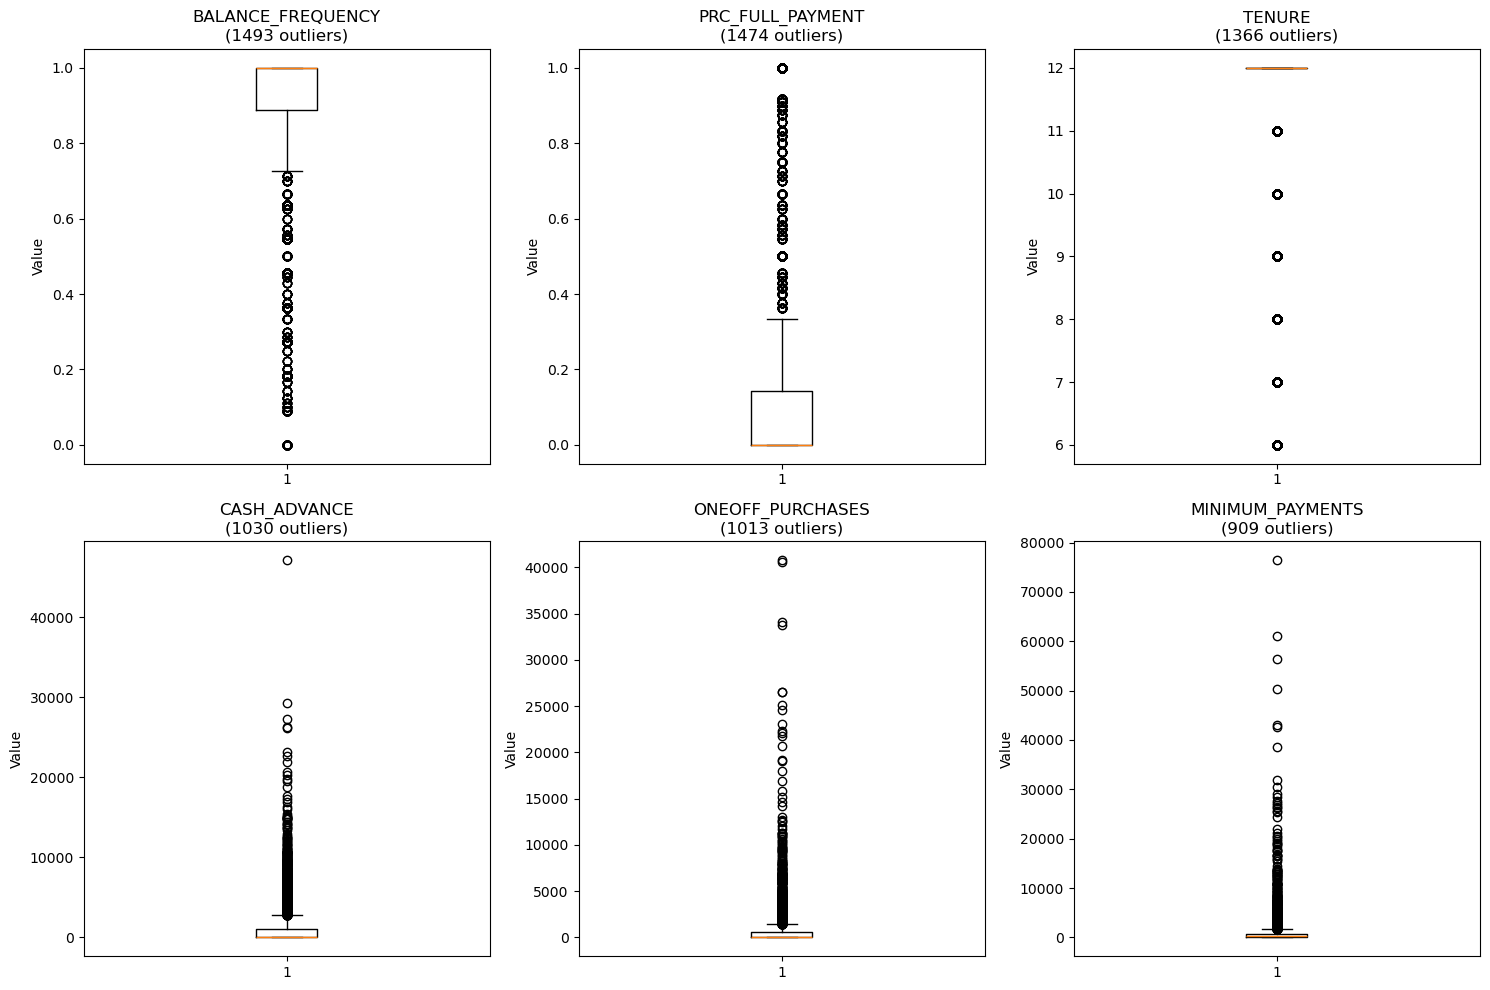

In [21]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers)

print("\nOutliers per column:")
outlier_counts = {}
for col in df_features.columns:
    count = detect_outliers_iqr(df_features, col)
    if count > 0:
        outlier_counts[col] = count
        pct = (count / len(df_features)) * 100
        print(f"   {col}: {count} outliers ({pct:.2f}%)")

# Visualisasi boxplot untuk kolom dengan outliers terbanyak
if outlier_counts:
    top_outlier_cols = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:6]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, (col, count) in enumerate(top_outlier_cols):
        axes[idx].boxplot(df_features[col])
        axes[idx].set_title(f'{col}\n({count} outliers)')
        axes[idx].set_ylabel('Value')
    
    plt.tight_layout()
    plt.show()

df_clean = df_features.copy()

> Code block ini mendeteksi outlier menggunakan metode IQR (Interquartile Range) untuk setiap kolom numerik dalam dataset. Outlier didefinisikan sebagai nilai yang berada di luar rentang [Q1 - 1.5×IQR, Q3 + 1.5×IQR]. Hasil analisis menunjukkan jumlah dan persentase outlier untuk setiap fitur. Visualisasi boxplot dibuat untuk 6 kolom dengan jumlah outlier terbanyak, membantu memahami distribusi data dan ekstremitas nilai. Dalam clustering, outlier tidak selalu dihapus karena bisa merepresentasikan segmen pelanggan yang unik dan berharga, seperti pelanggan premium dengan transaksi sangat tinggi atau pelanggan dorman dengan aktivitas minimal.

### Feature Distribution

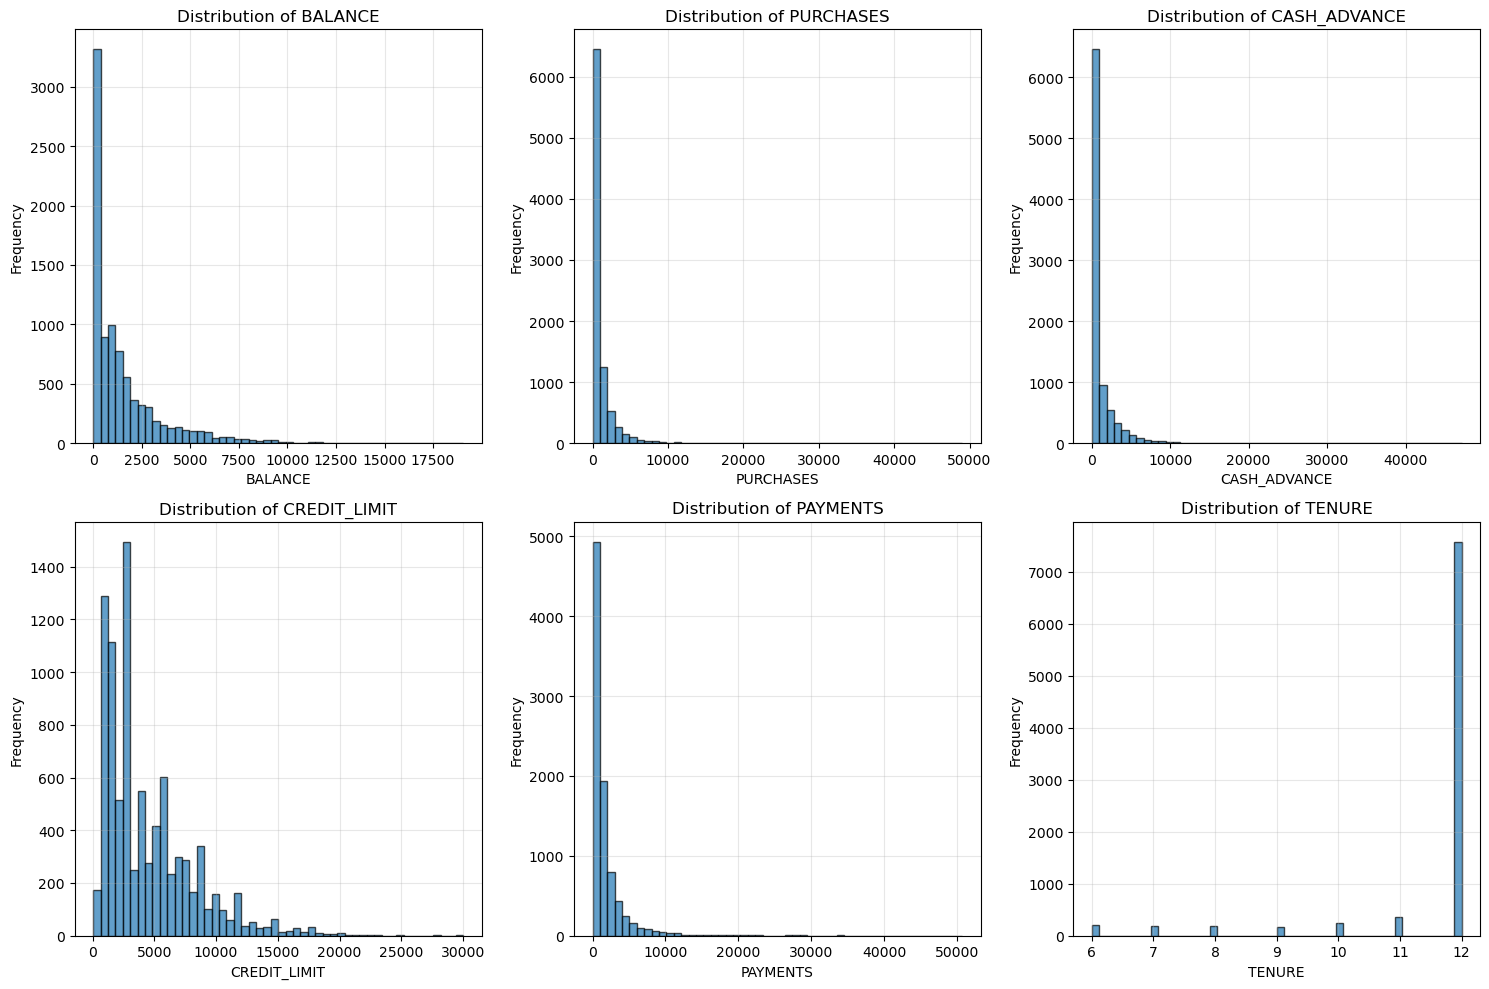

In [22]:
# Plot distributions of key features
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 
                'PAYMENTS', 'TENURE']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    axes[idx].hist(df_clean[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

> Code block ini memvisualisasikan distribusi dari 6 fitur kunci menggunakan histogram: BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, dan TENURE. Visualisasi distribusi penting untuk memahami karakteristik data, mengidentifikasi skewness (kemiringan distribusi), dan mendeteksi pola-pola tertentu dalam perilaku pelanggan. Sebagian besar fitur finansial cenderung memiliki distribusi skewed (miring ke kanan) dengan banyak nilai rendah dan beberapa nilai ekstrem tinggi, yang umum terjadi pada data transaksi keuangan dimana sebagian besar pelanggan memiliki aktivitas moderat dan sebagian kecil memiliki aktivitas sangat tinggi.

### Correlations

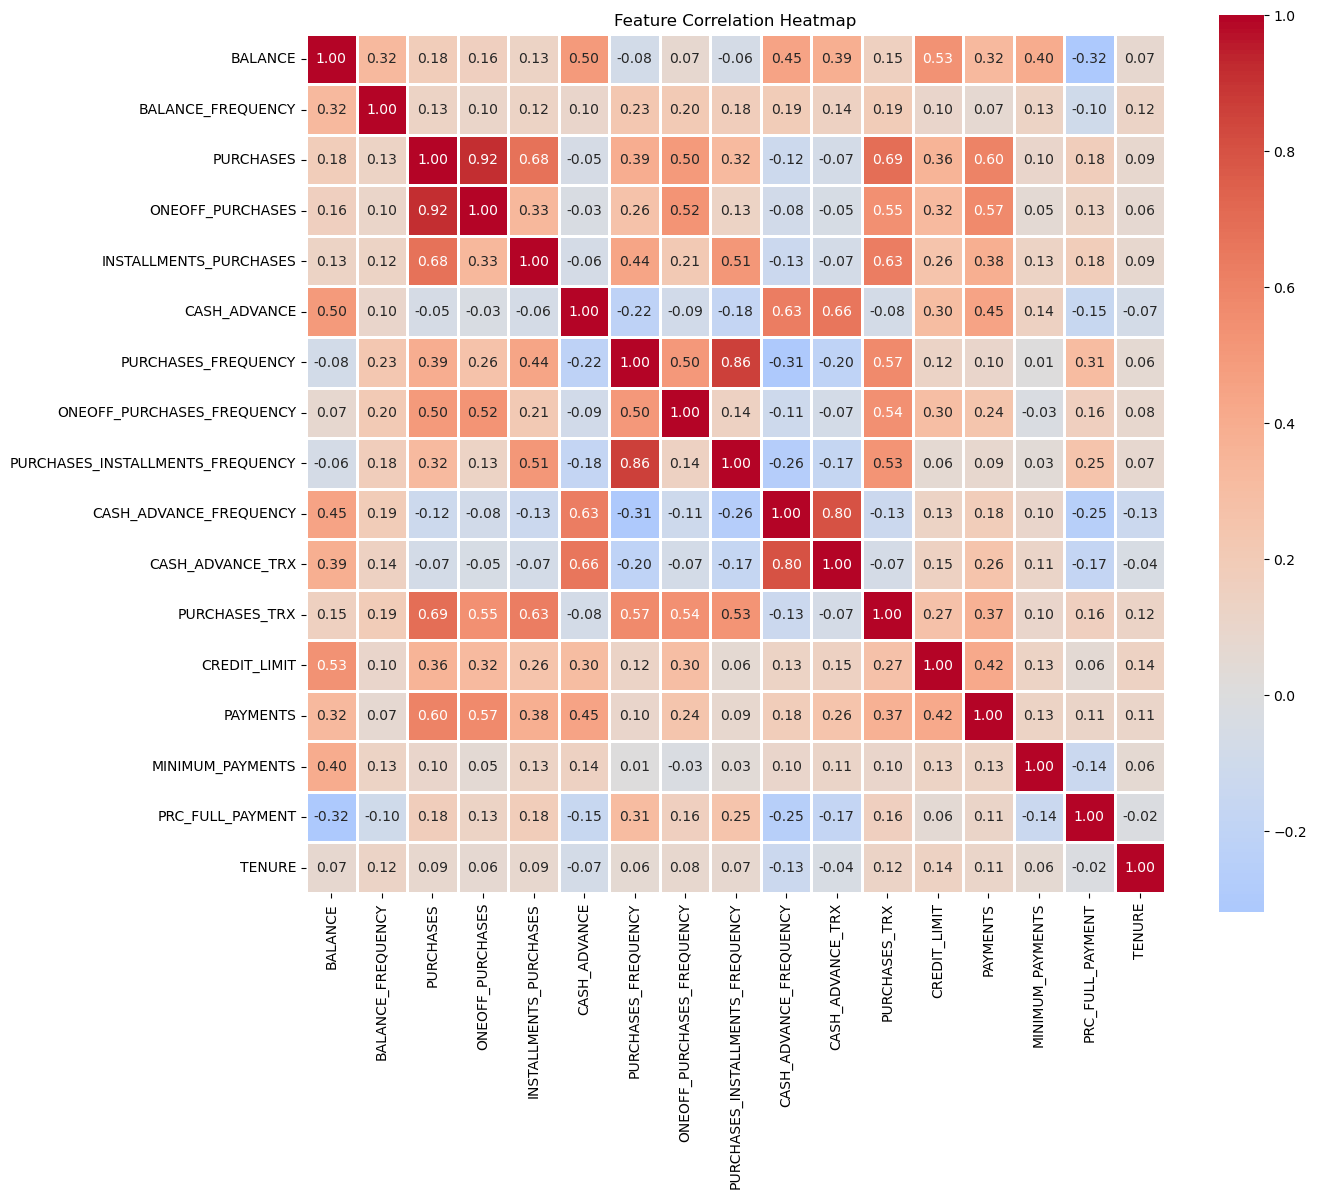


Highly Correlated Features (|correlation| > 0.8):


,Feature 1,Feature 2,Correlation
0,PURCHASES,ONEOFF_PURCHASES,0.916845
1,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,0.862934


In [23]:
# Calculate correlation matrix
correlation_matrix = df_clean.corr()

# Visualisasi heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Find highly correlated features (>0.8)
print("\nHighly Correlated Features (|correlation| > 0.8):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr)
    display(high_corr_df)
else:
    print("   No highly correlated features found")

> Code block ini menganalisis korelasi antar fitur dengan membuat correlation matrix dan memvisualisasikannya dalam bentuk heatmap. Heatmap menggunakan color scheme 'coolwarm' dimana warna merah menunjukkan korelasi positif tinggi, biru menunjukkan korelasi negatif, dan putih menunjukkan korelasi mendekati nol. Analisis ini penting untuk mengidentifikasi multikolinearitas (fitur yang sangat berkorelasi), yang dapat mempengaruhi performa beberapa algoritma clustering. Code juga mendeteksi dan menampilkan pasangan fitur dengan korelasi absolut > 0.8, yang mungkin perlu dipertimbangkan untuk feature selection atau dimensionality reduction.

### Feature Scaling

In [24]:
# Standardize features (important for clustering!)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)
df_scaled = pd.DataFrame(df_scaled, columns=df_clean.columns, index=df_clean.index)

print(f"Features scaled using StandardScaler")
print(f"\nSample scaled features:")
display(df_scaled.head())

print(f"\nScaled data statistics:")
print(f"Mean: {df_scaled.mean().mean():.4f}")
print(f"Std: {df_scaled.std().mean():.4f}")

Features scaled using StandardScaler

Sample scaled features:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068



Scaled data statistics:
Mean: 0.0000
Std: 1.0001


> Code block ini melakukan standardisasi fitur menggunakan StandardScaler, yang mengubah setiap fitur sehingga memiliki mean 0 dan standard deviation 1. Standardisasi sangat penting untuk algoritma clustering seperti K-Means dan DBSCAN yang berbasis jarak (distance-based), karena fitur dengan skala besar dapat mendominasi perhitungan jarak. Tanpa scaling, fitur seperti CREDIT_LIMIT (rentang ribuan) akan memiliki pengaruh jauh lebih besar dibanding fitur seperti BALANCE_FREQUENCY (rentang 0-1). Verifikasi dilakukan dengan menampilkan sample data scaled dan statistik untuk memastikan proses standardisasi berhasil dengan mean mendekati 0 dan std mendekati 1.

### Elbow Method - Finding Optimal K

Testing different K values...
K=2: Inertia=127784.53
K=3: Inertia=111975.04
K=4: Inertia=99061.94
K=5: Inertia=91490.50
K=6: Inertia=84826.59
K=7: Inertia=79856.16
K=8: Inertia=74484.88
K=9: Inertia=69828.70
K=10: Inertia=66466.41


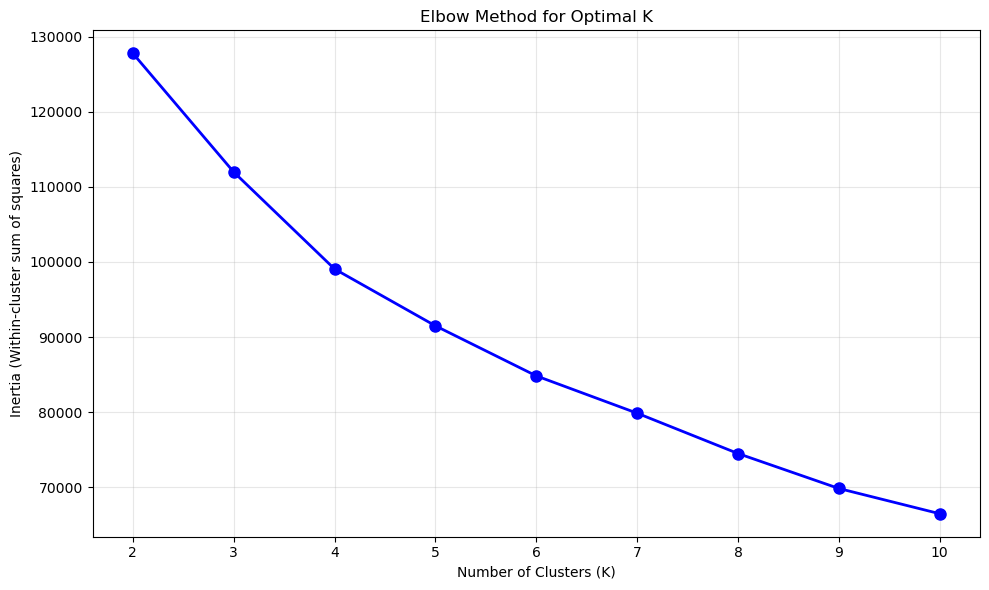

In [25]:
# Calculate inertia for different K values
inertias = []
K_range = range(2, 11)

print("Testing different K values...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

> Code block ini mengimplementasikan Elbow Method untuk menentukan jumlah cluster optimal (K) dalam K-Means clustering. Method ini menghitung inertia (within-cluster sum of squares) untuk berbagai nilai K dari 2 hingga 10. Inertia mengukur seberapa kompak cluster yang terbentuk - semakin rendah inertia, semakin tight cluster tersebut. Hasil divisualisasikan dalam elbow curve dimana sumbu X adalah jumlah cluster dan sumbu Y adalah inertia. Titik "elbow" (siku) pada grafik menunjukkan K optimal, yaitu titik dimana penambahan cluster tidak lagi memberikan penurunan inertia yang signifikan. Metode ini membantu balance antara kompleksitas model (banyak cluster) dan kualitas clustering.

### Silhouette Analysis

Calculating silhouette scores...
K=2: Silhouette Score=0.2100
K=3: Silhouette Score=0.2510
K=4: Silhouette Score=0.1977
K=5: Silhouette Score=0.1931
K=6: Silhouette Score=0.2029
K=7: Silhouette Score=0.2077
K=8: Silhouette Score=0.2217
K=9: Silhouette Score=0.2260
K=10: Silhouette Score=0.2204


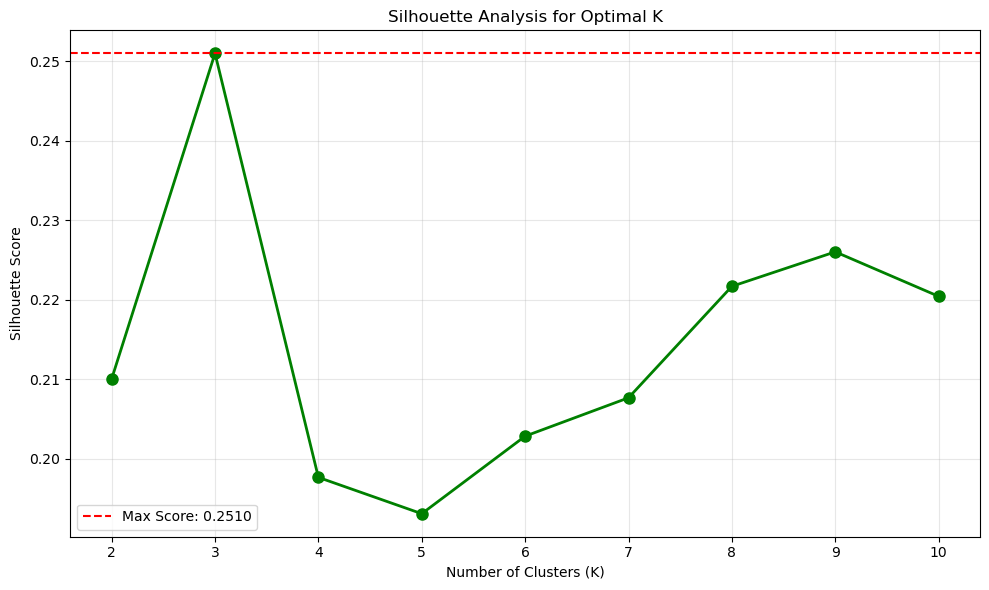


Best K based on Silhouette Score: 3


In [26]:
# Calculate silhouette scores for different K values
silhouette_scores = []

print("Calculating silhouette scores...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score={score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid(alpha=0.3)
plt.xticks(K_range)
plt.axhline(y=max(silhouette_scores), color='r', linestyle='--', 
            label=f'Max Score: {max(silhouette_scores):.4f}')
plt.legend()
plt.tight_layout()
plt.show()

# Best K based on silhouette score
best_k_silhouette = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nBest K based on Silhouette Score: {best_k_silhouette}")

> Code block ini melakukan Silhouette Analysis untuk mengevaluasi kualitas clustering pada berbagai nilai K. Silhouette score mengukur seberapa mirip sebuah data point dengan cluster-nya sendiri dibandingkan dengan cluster lain, dengan nilai berkisar dari -1 hingga 1. Score mendekati 1 menunjukkan clustering yang baik (data point jauh dari cluster tetangga), mendekati 0 menunjukkan data point berada di boundary antar cluster, dan nilai negatif menunjukkan data mungkin di-assign ke cluster yang salah. Hasil divisualisasikan dalam line plot dengan marking pada score tertinggi. K optimal berdasarkan silhouette score adalah yang memberikan nilai tertinggi, dalam kasus ini K=3 dengan score 0.2510.

### Combine Elbow and Silhouette

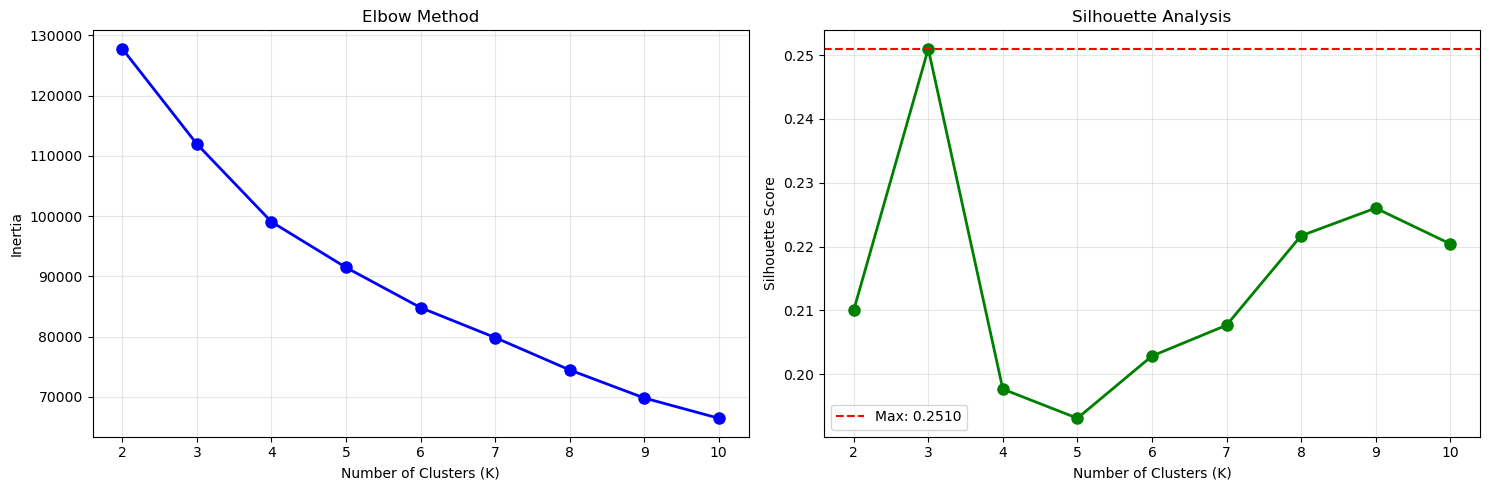


Best K recommendations:
   Elbow Method: Look for the 'elbow' point in the graph
   Silhouette Score: K=3 (score: 0.2510)


In [27]:
# Visualisasi combined
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow plot
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(alpha=0.3)
axes[0].set_xticks(K_range)

# Silhouette plot
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis')
axes[1].grid(alpha=0.3)
axes[1].set_xticks(K_range)
axes[1].axhline(y=max(silhouette_scores), color='r', linestyle='--', 
                label=f'Max: {max(silhouette_scores):.4f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nBest K recommendations:")
print(f"   Elbow Method: Look for the 'elbow' point in the graph")
print(f"   Silhouette Score: K={best_k_silhouette} (score: {max(silhouette_scores):.4f})")

> Code block ini menggabungkan visualisasi Elbow Method dan Silhouette Analysis dalam satu figure untuk memudahkan perbandingan dan pengambilan keputusan. Dua subplot ditampilkan side-by-side: subplot pertama menunjukkan elbow curve untuk mengidentifikasi penurunan inertia, dan subplot kedua menunjukkan silhouette scores dengan line marking pada nilai maksimum. Kombinasi kedua metode ini memberikan perspektif yang lebih komprehensif dalam memilih K optimal - Elbow Method fokus pada kompaktness cluster sedangkan Silhouette Score fokus pada separasi antar cluster. Pendekatan dual-method ini meningkatkan confidence dalam pemilihan K optimal.

### Choose Optimal K

In [28]:
# Choose optimal K based on Silhouette score
optimal_k = best_k_silhouette

print(f"\nSelected optimal K: {optimal_k}")
print(f"\nDecision Process:")
print(f"   1. Elbow Method: Visually identified potential K values")
print(f"   2. Silhouette Score: K={optimal_k} has highest score ({max(silhouette_scores):.4f})")
print(f"   3. Final choice: K={optimal_k}")
print(f"\nSilhouette Score Interpretation:")
print(f"   0.71-1.0: Strong structure")
print(f"   0.51-0.70: Reasonable structure")
print(f"   0.26-0.50: Weak structure")
print(f"   < 0.25: No substantial structure")
print(f"\n   Your score: {max(silhouette_scores):.4f}")

if max(silhouette_scores) >= 0.51:
    print(f"   Good clustering quality!")
elif max(silhouette_scores) >= 0.26:
    print(f"   Moderate clustering quality")
else:
    print(f"   Poor clustering quality - consider feature engineering")


Selected optimal K: 3

Decision Process:
   1. Elbow Method: Visually identified potential K values
   2. Silhouette Score: K=3 has highest score (0.2510)
   3. Final choice: K=3

Silhouette Score Interpretation:
   0.71-1.0: Strong structure
   0.51-0.70: Reasonable structure
   0.26-0.50: Weak structure
   < 0.25: No substantial structure

   Your score: 0.2510
   Poor clustering quality - consider feature engineering


> Code block ini membuat keputusan final tentang nilai K optimal berdasarkan hasil Elbow Method dan Silhouette Analysis. K optimal dipilih berdasarkan silhouette score tertinggi, yaitu K=3 dengan score 0.2510. Ditampilkan juga interpretasi silhouette score berdasarkan range standar: 0.71-1.0 (strong structure), 0.51-0.70 (reasonable structure), 0.26-0.50 (weak structure), dan <0.25 (no substantial structure). Dalam kasus ini, score 0.2510 mengindikasikan poor clustering quality, yang menunjukkan bahwa data tidak memiliki struktur cluster yang jelas secara natural. Ini bisa menjadi indikasi perlunya feature engineering, transformasi data, atau eksplorasi algoritma clustering alternatif.

### Train K Means

In [29]:
# Train K-Means
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df_clustered = df_clean.copy()
df_clustered['Cluster'] = kmeans_labels
df_clustered['CUST_ID'] = customer_ids.values

print(f"K-Means clustering complete!")
print(f"\nCluster distribution:")
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    pct = (count / len(kmeans_labels)) * 100
    print(f"   Cluster {cluster_id}: {count} customers ({pct:.2f}%)")

K-Means clustering complete!

Cluster distribution:
   Cluster 0: 1275 customers (14.25%)
   Cluster 1: 6114 customers (68.31%)
   Cluster 2: 1561 customers (17.44%)


> Code block ini melatih model K-Means dengan jumlah cluster optimal (K=3) yang telah ditentukan sebelumnya. Parameter n_init=10 berarti algoritma akan dijalankan 10 kali dengan centroid awal yang berbeda dan memilih hasil terbaik. Random_state=42 digunakan untuk reproducibility. Setelah training, cluster labels ditambahkan ke dataframe original beserta CUST_ID untuk identifikasi pelanggan. Distribusi cluster ditampilkan menunjukkan Cluster 0 dengan 1,275 pelanggan (14.25%), Cluster 1 dengan 6,114 pelanggan (68.31%), dan Cluster 2 dengan 1,561 pelanggan (17.44%). Distribusi yang tidak seimbang ini normal dalam customer segmentation dimana satu segment (biasanya pelanggan reguler) mendominasi.

In [30]:
# Calculate final metrics (only Silhouette & Inertia)
silhouette_final = silhouette_score(df_scaled, kmeans_labels)

print(f"\nFinal K-Means Performance:")
print(f"Silhouette Score: {silhouette_final:.4f}")
print(f"   → Interpretation: ", end="")
if silhouette_final >= 0.51:
    print("Good clustering quality")
elif silhouette_final >= 0.26:
    print("Moderate clustering quality")
else:
    print("Poor clustering quality")

print(f"\nInertia: {kmeans_final.inertia_:.2f}")
print(f"   → Lower inertia = tighter clusters")
print(f"   → Inertia decreases as K increases")


Final K-Means Performance:
Silhouette Score: 0.2510
   → Interpretation: Poor clustering quality

Inertia: 111975.04
   → Lower inertia = tighter clusters
   → Inertia decreases as K increases


> Code block ini mengevaluasi performa model K-Means menggunakan dua metrik utama: Silhouette Score dan Inertia. Silhouette Score (0.2510) memberikan penilaian kualitatif tentang seberapa baik data points ter-cluster, dengan interpretasi otomatis berdasarkan threshold standar. Score ini mengonfirmasi poor clustering quality yang telah diidentifikasi sebelumnya. Inertia (111,975.04) mengukur total within-cluster sum of squares - semakin rendah nilai inertia, semakin kompak cluster yang terbentuk. Penjelasan juga diberikan bahwa inertia akan selalu menurun seiring bertambahnya K, sehingga tidak bisa digunakan sendiri untuk menentukan K optimal tanpa metode complementary seperti Silhouette atau Elbow.

### Visualization


PCA Variance Explained:
PC1: 27.30%
PC2: 20.31%
Total: 47.61%


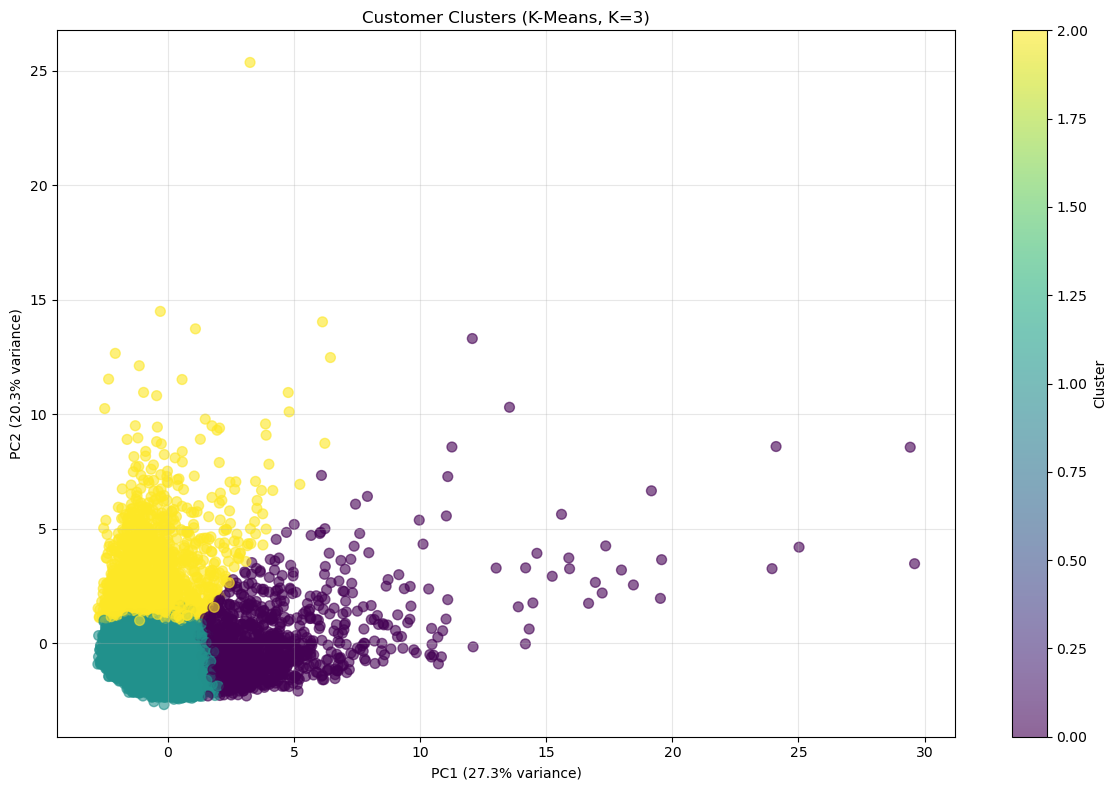

In [31]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

print(f"\nPCA Variance Explained:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Plot clusters in 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], 
                     c=kmeans_labels, cmap='viridis', 
                     alpha=0.6, s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title(f'Customer Clusters (K-Means, K={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

> Code block ini menggunakan PCA (Principal Component Analysis) untuk mereduksi dimensi data dari 17 fitur menjadi 2 komponen utama (PC1 dan PC2) untuk keperluan visualisasi. Variance explained ditampilkan untuk menunjukkan seberapa banyak informasi original yang dipertahankan oleh kedua komponen - total variance explained mengindikasikan kualitas representasi 2D. Scatter plot dibuat dengan PC1 pada sumbu X dan PC2 pada sumbu Y, dimana setiap data point diwarnai sesuai cluster assignment dari K-Means. Visualisasi ini membantu memahami separasi antar cluster secara visual dan mengidentifikasi apakah cluster terbentuk dengan jelas atau overlap. Overlap yang signifikan dapat menjelaskan mengapa silhouette score rendah.

### Cluster Profiling


Cluster Profiles (Mean Values):


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,2182.352833,0.981702,4187.017796,2663.995153,1523.493231,449.753140,0.948175,0.664780,0.739630,0.062415,1.507451,55.692549,7642.784314,4075.533648,1227.915879,0.298766,11.916863
1,807.722510,0.834577,496.062522,247.273214,249.110368,338.996760,0.460353,0.129191,0.342052,0.069563,1.236833,8.480046,3267.022176,907.446164,530.068546,0.154115,11.475793
2,4023.788865,0.959193,389.051448,252.333261,136.797412,3917.254973,0.233899,0.111806,0.145661,0.451410,12.551570,5.636131,6729.471201,3053.943771,1765.204181,0.033673,11.353619


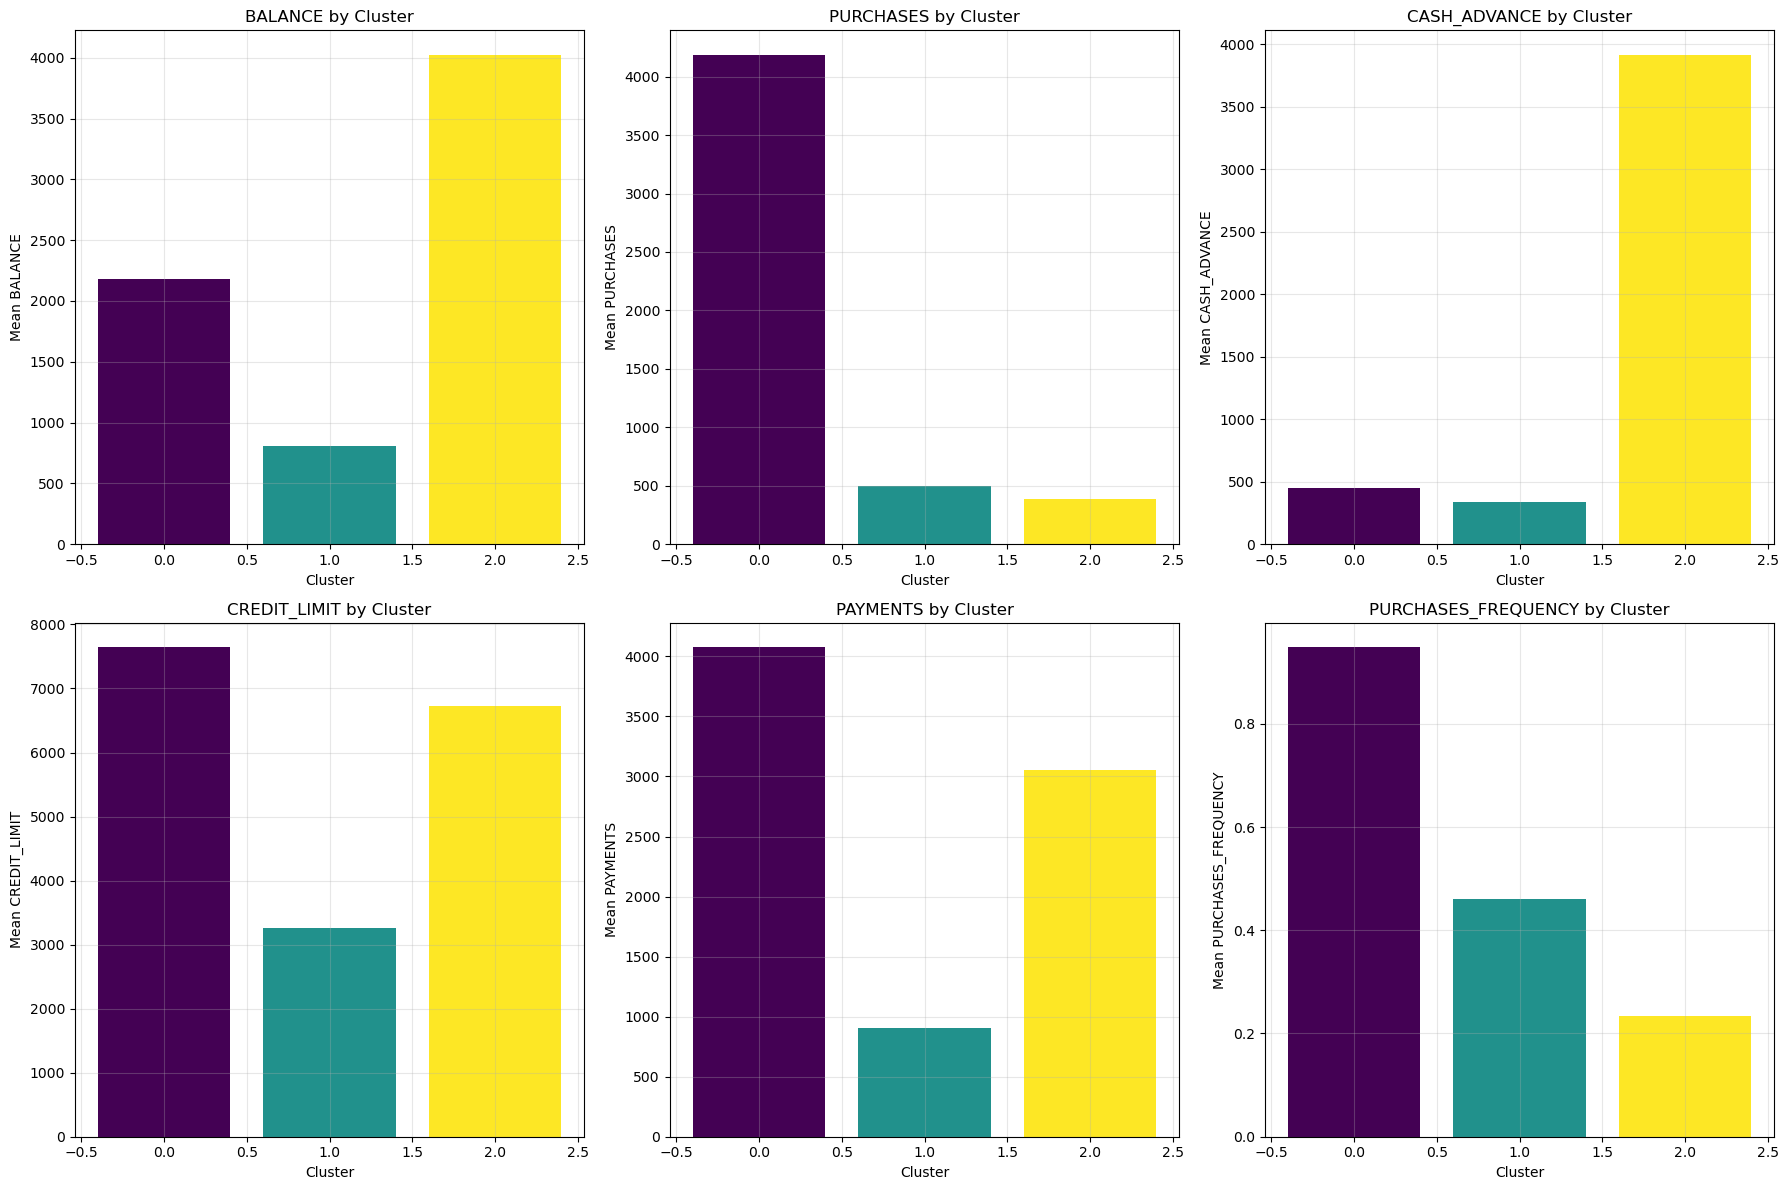

In [32]:
# Calculate cluster statistics (exclude CUST_ID column which is non-numeric)
numeric_cols = df_clustered.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('Cluster')  # Remove cluster column itself from mean calculation
cluster_profiles = df_clustered.groupby('Cluster')[numeric_cols].mean()

print("\nCluster Profiles (Mean Values):")
display(cluster_profiles)

# Visualisasi cluster profiles untuk key features
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 
                'PAYMENTS', 'PURCHASES_FREQUENCY']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    cluster_means = df_clustered.groupby('Cluster')[feature].mean()
    axes[idx].bar(cluster_means.index, cluster_means.values, 
                  color=plt.cm.viridis(np.linspace(0, 1, optimal_k)))
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(f'Mean {feature}')
    axes[idx].set_title(f'{feature} by Cluster')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

> Code block ini membuat profil detail untuk setiap cluster dengan menghitung rata-rata nilai setiap fitur numerik per cluster, dengan mengecualikan kolom CUST_ID (non-numeric) dan kolom Cluster itu sendiri. Cluster profiles ditampilkan dalam tabel yang menunjukkan karakteristik numerik setiap segment pelanggan. Visualisasi bar chart dibuat untuk 6 fitur kunci (BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, PURCHASES_FREQUENCY) dimana setiap cluster direpresentasikan sebagai bar dengan warna berbeda. Profiling ini sangat penting untuk interpretasi bisnis - membantu mengidentifikasi karakteristik unik setiap segment seperti high spenders, cash advance users, atau inactive customers. Informasi ini menjadi dasar untuk strategi marketing, risk management, dan customer relationship management yang berbeda untuk setiap segment.

In [33]:
# Analyze each cluster
for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster_id} ({len(cluster_data)} customers)")
    print(f"{'='*50}")
    
    # Key characteristics
    print(f"\nKey Characteristics:")
    print(f"  Average Balance: ${cluster_data['BALANCE'].mean():,.2f}")
    print(f"  Average Purchases: ${cluster_data['PURCHASES'].mean():,.2f}")
    print(f"  Average Cash Advance: ${cluster_data['CASH_ADVANCE'].mean():,.2f}")
    print(f"  Average Credit Limit: ${cluster_data['CREDIT_LIMIT'].mean():,.2f}")
    print(f"  Average Payments: ${cluster_data['PAYMENTS'].mean():,.2f}")
    print(f"  Purchase Frequency: {cluster_data['PURCHASES_FREQUENCY'].mean():.2f}")
    print(f"  Average Tenure: {cluster_data['TENURE'].mean():.1f} months")
    
    # Behavioral patterns
    print(f"\nBehavioral Patterns:")
    oneoff_ratio = cluster_data['ONEOFF_PURCHASES'].mean() / (cluster_data['PURCHASES'].mean() + 1)
    install_ratio = cluster_data['INSTALLMENTS_PURCHASES'].mean() / (cluster_data['PURCHASES'].mean() + 1)
    cash_ratio = cluster_data['CASH_ADVANCE'].mean() / (cluster_data['BALANCE'].mean() + 1)
    
    print(f"  One-off Purchase Ratio: {oneoff_ratio:.2f}")
    print(f"  Installment Purchase Ratio: {install_ratio:.2f}")
    print(f"  Cash Advance Ratio: {cash_ratio:.2f}")


CLUSTER 0 (1275 customers)

Key Characteristics:
  Average Balance: $2,182.35
  Average Purchases: $4,187.02
  Average Cash Advance: $449.75
  Average Credit Limit: $7,642.78
  Average Payments: $4,075.53
  Purchase Frequency: 0.95
  Average Tenure: 11.9 months

Behavioral Patterns:
  One-off Purchase Ratio: 0.64
  Installment Purchase Ratio: 0.36
  Cash Advance Ratio: 0.21

CLUSTER 1 (6114 customers)

Key Characteristics:
  Average Balance: $807.72
  Average Purchases: $496.06
  Average Cash Advance: $339.00
  Average Credit Limit: $3,267.02
  Average Payments: $907.45
  Purchase Frequency: 0.46
  Average Tenure: 11.5 months

Behavioral Patterns:
  One-off Purchase Ratio: 0.50
  Installment Purchase Ratio: 0.50
  Cash Advance Ratio: 0.42

CLUSTER 2 (1561 customers)

Key Characteristics:
  Average Balance: $4,023.79
  Average Purchases: $389.05
  Average Cash Advance: $3,917.25
  Average Credit Limit: $6,729.47
  Average Payments: $3,053.94
  Purchase Frequency: 0.23
  Average Tenure:

> Code block ini melakukan interpretasi mendalam terhadap setiap cluster dengan menganalisis karakteristik kunci dan pola perilaku pelanggan. Untuk setiap cluster ditampilkan: (1) Key Characteristics termasuk average balance, purchases, cash advance, credit limit, payments, purchase frequency, dan tenure yang memberikan gambaran finansial segment, dan (2) Behavioral Patterns yang menghitung rasio one-off purchases, installment purchases, dan cash advance terhadap total aktivitas untuk memahami preferensi transaksi. Analisis ini mentransformasi angka-angka statistik menjadi insight bisnis yang actionable, seperti mengidentifikasi "Premium Customers" dengan balance dan purchases tinggi, "Cash Advance Users" yang sering menarik tunai, atau "Low Engagement Customers" dengan aktivitas minimal.

### Hierarchical Clustering


Creating dendrogram (using 1000 samples)...


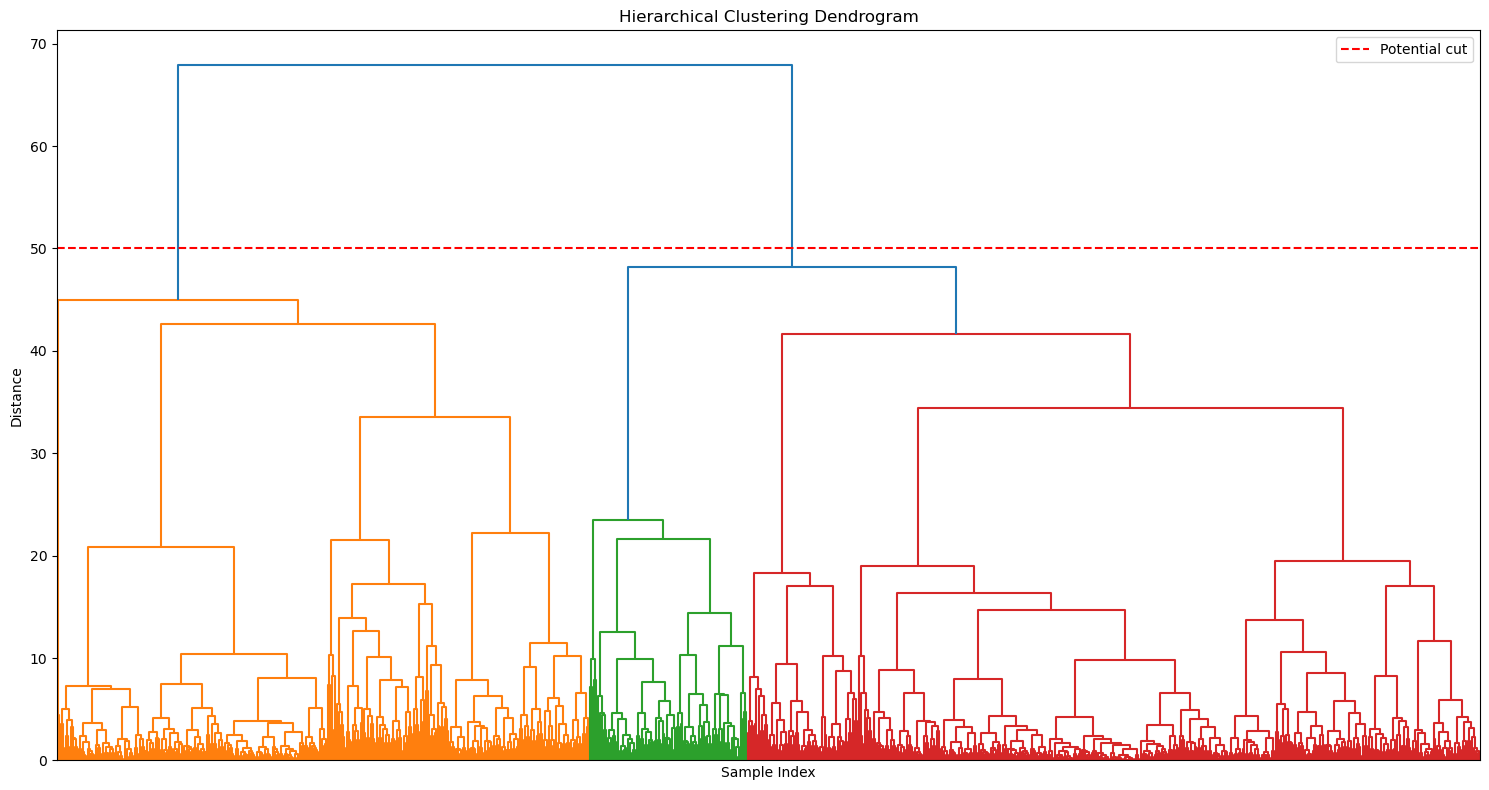


Hierarchical Clustering Performance:
Silhouette Score: 0.1674

Cluster distribution:
   Cluster 0: 2881 customers (32.19%)
   Cluster 1: 4875 customers (54.47%)
   Cluster 2: 1194 customers (13.34%)


In [34]:
# Dendrogram (use sample for visualization if data is large)
sample_size = min(1000, len(df_scaled))
sample_indices = np.random.choice(len(df_scaled), sample_size, replace=False)
df_sample = df_scaled.iloc[sample_indices]

print(f"\nCreating dendrogram (using {sample_size} samples)...")
linkage_matrix = linkage(df_sample, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=50, color='r', linestyle='--', label='Potential cut')
plt.legend()
plt.tight_layout()
plt.show()

# Train Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(df_scaled)

# Evaluate
silhouette_hier = silhouette_score(df_scaled, hierarchical_labels)
print(f"\nHierarchical Clustering Performance:")
print(f"Silhouette Score: {silhouette_hier:.4f}")

print(f"\nCluster distribution:")
hier_counts = pd.Series(hierarchical_labels).value_counts().sort_index()
for cluster_id, count in hier_counts.items():
    pct = (count / len(hierarchical_labels)) * 100
    print(f"   Cluster {cluster_id}: {count} customers ({pct:.2f}%)")

> Code block ini mengimplementasikan Hierarchical Clustering sebagai metode alternatif untuk membandingkan dengan K-Means. Karena dendrogram untuk dataset besar sulit divisualisasikan, digunakan sample 1,000 data points. Linkage matrix dihitung menggunakan Ward's method yang meminimalkan variance dalam cluster. Dendrogram divisualisasikan menunjukkan struktur hierarkis penggabungan cluster, dengan garis horizontal merah sebagai potential cut point untuk membentuk jumlah cluster tertentu. Model Agglomerative Clustering kemudian ditrain pada seluruh data dengan K=3 untuk konsistensi perbandingan. Silhouette score dan distribusi cluster ditampilkan untuk evaluasi. Hierarchical clustering dapat menghasilkan cluster yang berbeda dari K-Means karena pendekatan bottom-up yang berbeda, memberikan perspektif alternatif dalam segmentasi pelanggan.

### DBScan

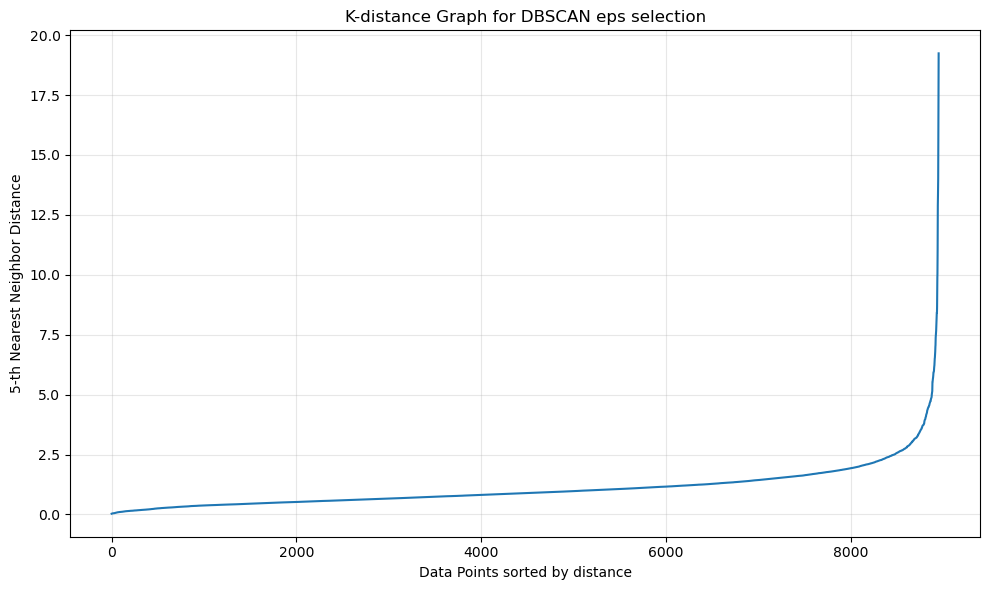


DBSCAN Results:
Number of clusters: 1
Number of noise points: 242 (2.70%)


In [35]:
# Find optimal eps using k-distance graph
from sklearn.neighbors import NearestNeighbors

# Calculate k-nearest neighbors distances
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances[:, k-1], axis=0)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title('K-distance Graph for DBSCAN eps selection')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Train DBSCAN
eps_value = 3.0  # Adjust based on k-distance graph
min_samples = 10

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Count clusters (excluding noise points labeled as -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nDBSCAN Results:")
print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise} ({n_noise/len(dbscan_labels)*100:.2f}%)")

if n_clusters_dbscan > 1:
    # Evaluate (excluding noise points)
    mask = dbscan_labels != -1
    if mask.sum() > 1:
        silhouette_dbscan = silhouette_score(df_scaled[mask], dbscan_labels[mask])
        print(f"Silhouette Score (excluding noise): {silhouette_dbscan:.4f}")

> Code block ini mengimplementasikan DBSCAN (Density-Based Spatial Clustering of Applications with Noise), algoritma clustering berbasis densitas yang dapat menemukan cluster dengan bentuk arbitrary dan mengidentifikasi noise points (outliers). K-distance graph dibuat untuk membantu menentukan parameter eps optimal dengan memplot sorted distances ke k-th nearest neighbor - titik "elbow" pada grafik menunjukkan eps yang sesuai. DBSCAN ditrain dengan eps=3.0 dan min_samples=10. Berbeda dengan K-Means, DBSCAN tidak memerlukan spesifikasi jumlah cluster sebelumnya dan dapat mengidentifikasi noise points (labeled -1). Hasil menampilkan jumlah cluster yang terbentuk secara otomatis, persentase noise points, dan silhouette score (jika ada lebih dari 1 cluster). DBSCAN berguna untuk menemukan segment pelanggan dengan pola unik yang mungkin terlewat oleh K-Means.

### Evaluate

In [36]:
print(f"""
✅ Summary:
   - Total Customers Analyzed: {len(df):,}
   - Clustering Method: K-Means
   - Optimal Number of Clusters: {optimal_k}
   - Silhouette Score: {silhouette_final:.4f}
   
📊 K Selection Methods Used:
   1. Elbow Method - Visual identification
   2. Silhouette Score - Quantitative validation
   
📊 Cluster Distribution:
""")

for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    pct = (count / len(kmeans_labels)) * 100
    print(f"   Cluster {cluster_id}: {count} customers ({pct:.2f}%)")


✅ Summary:
   - Total Customers Analyzed: 8,950
   - Clustering Method: K-Means
   - Optimal Number of Clusters: 3
   - Silhouette Score: 0.2510
   
📊 K Selection Methods Used:
   1. Elbow Method - Visual identification
   2. Silhouette Score - Quantitative validation
   
📊 Cluster Distribution:

   Cluster 0: 1275 customers (14.25%)
   Cluster 1: 6114 customers (68.31%)
   Cluster 2: 1561 customers (17.44%)


> Summary mencakup total pelanggan yang dianalisis (8,950), metode clustering yang dipilih (K-Means), jumlah cluster optimal (3), dan silhouette score final (0.2510). Dijelaskan juga metode yang digunakan untuk menentukan K optimal: Elbow Method untuk identifikasi visual dan Silhouette Score untuk validasi kuantitatif. Distribusi pelanggan di setiap cluster ditampilkan dengan jumlah absolut dan persentase, menunjukkan bahwa Cluster 1 mendominasi dengan 68.31% pelanggan. Summary ini berfungsi sebagai dokumentasi hasil analisis dan executive summary untuk stakeholder bisnis yang memerlukan insight segmentasi pelanggan untuk strategi marketing, product development, atau risk management.